In [18]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LassoCV

import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('../../data_col/FinalDataSet.csv', index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,DateSortie,Studio,Score,Rate,Review,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,GK_licence,GK_distributeur
0,Wii Sports,Wii,2006.0,Sports,Nintendo,2006-11-01,Nintendo,7.6,7.05,210.0,41.49,29.02,3.77,8.46,82.74,Wii Sports,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,NaN,Nintendo,7.0,8.40,235.0,29.08,3.58,6.81,0.77,40.24,Mario,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,2008-04-01,Nintendo,7.6,8.00,319.0,15.85,12.88,3.79,3.31,35.82,Mario,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,2009-07-01,Nintendo,7.5,7.35,103.0,15.75,11.01,3.28,2.96,33.00,Wii Sports,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,NaN,Nintendo,7.0,8.20,138.0,11.27,8.89,10.22,1.00,31.37,PokǸmon,NaN


In [57]:
df['GK_licence'] = df['GK_licence'].str.strip()
df['DateSortie'] = df['DateSortie'].fillna('0000-01-00')
df['Mois'] = df['DateSortie'].apply(lambda x: str(x).split('-')[1])
df['Mois'] = df['Mois'].astype('float')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16617 entries, 0 to 17892
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16617 non-null  object 
 1   Platform         16617 non-null  object 
 2   Year             16397 non-null  float64
 3   Genre            16617 non-null  object 
 4   Publisher        16558 non-null  object 
 5   DateSortie       16617 non-null  object 
 6   Studio           13976 non-null  object 
 7   Score            10460 non-null  float64
 8   Rate             11595 non-null  float64
 9   Review           9967 non-null   float64
 10  NA_Sales         16617 non-null  float64
 11  EU_Sales         16617 non-null  float64
 12  JP_Sales         16617 non-null  float64
 13  Other_Sales      16617 non-null  float64
 14  Global_Sales     16617 non-null  float64
 15  GK_licence       10908 non-null  object 
 16  GK_distributeur  2421 non-null   object 
 17  Mois        

In [60]:
df.to_csv('/Users/jeremy/Desktop/DATASCIENTEST/02_Projet_GameSpy/data_col/FinalDataSetMonths.csv')

In [59]:
def uniques(serie):
    unique = serie.unique()
    return len(unique)

# RAJOUT D'INFOS SUR LA LICENCE
## Ajout des moyennes mobiles des ventes par licence

In [60]:
df_licence = df.groupby('GK_licence').agg({'Name': uniques}).sort_values(by = ['Name'], ascending=False)
df_licence = df_licence.rename_axis('GK_licence').reset_index()
licence = list(df_licence['GK_licence'])

df_rmsales = pd.DataFrame(columns=['Global_Sales', 'Year', 'Name', 'rm_sales_2', 'rm_sales_3',
       'rm_sales_4', 'rm_sales_5'])

for licence in licence:
    df_temp = df[df['GK_licence']==licence]
    df_temp = df_temp.groupby('Name').agg({'Global_Sales':'sum', 'Year':'mean'}).sort_values(by = ['Year'])
    df_temp['Name'] = df_temp.index
    df_temp['rm_sales_2'] = df_temp['Global_Sales'].rolling(2).mean()
    df_temp['rm_sales_3'] = df_temp['Global_Sales'].rolling(3).mean()
    df_temp['rm_sales_4'] = df_temp['Global_Sales'].rolling(4).mean()
    df_temp['rm_sales_5'] = df_temp['Global_Sales'].rolling(5).mean()
    df_rmsales = pd.concat([df_rmsales,df_temp], axis = 0)

df_final = df.merge(right=df_rmsales[['Name','rm_sales_2', 'rm_sales_3',
       'rm_sales_4', 'rm_sales_5']], on='Name', how='left')
df_final.drop_duplicates()

,Name,Platform,Year,Genre,Publisher,DateSortie,Studio,Score,Rate,Review,...,JP_Sales,Other_Sales,Global_Sales,GK_licence,GK_distributeur,Mois,rm_sales_2,rm_sales_3,rm_sales_4,rm_sales_5
0,Wii Sports,Wii,2006.0,Sports,Nintendo,2006-11-01,Nintendo,7.6,7.05,210.0,...,3.77,8.46,82.74,Wii Sports,Nintendo,11.0,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0000-01-00,Nintendo,7.0,8.40,235.0,...,6.81,0.77,40.24,Mario,NaN,1.0,22.055,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,2008-04-01,Nintendo,7.6,8.00,319.0,...,3.79,3.31,35.82,Mario,NaN,4.0,22.120,17.753333,14.255,13.708
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,2009-07-01,Nintendo,7.5,7.35,103.0,...,3.28,2.96,33.00,Wii Sports,NaN,7.0,57.870,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0000-01-00,Nintendo,7.0,8.20,138.0,...,10.22,1.00,31.37,PokǸmon,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16619,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0000-01-00,NaN,NaN,NaN,NaN,...,0.00,0.00,0.01,Woody Woodpecker,Nobilis,1.0,0.030,0.056667,NaN,NaN
16620,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,2003-02-01,Atari,3.0,NaN,NaN,...,0.00,0.00,0.01,Men In Black,NaN,2.0,0.285,NaN,NaN,NaN
16621,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0000-01-00,Left Field Productions,2.0,NaN,NaN,...,0.00,0.00,0.01,NaN,Activision,1.0,NaN,NaN,NaN,NaN
16622,Know How 2,DS,2010.0,Puzzle,7G//AMES,0000-01-00,InXile Entertainment,8.0,7.30,38.0,...,0.00,0.00,0.01,Wasteland,Deep Silver,1.0,NaN,NaN,NaN,NaN


In [64]:
df_final.sort_values(['GK_licence', 'Year']).head(30)

,Name,Platform,Year,Genre,Publisher,DateSortie,Studio,Score,Rate,Review,...,JP_Sales,Other_Sales,Global_Sales,GK_licence,GK_distributeur,Mois,rm_sales_2,rm_sales_3,rm_sales_4,rm_sales_5
9143,Akiba's Trip,PSP,2011.0,Adventure,Acquire,0000-01-00,NaN,3.00,5.70,19.0,...,0.14,0.00,0.14,"""Akiba's Trip """,NaN,1.0,NaN,NaN,NaN,NaN
11525,Akiba's Trip Plus,PSP,2012.0,Adventure,Acquire,0000-01-00,Acquire,NaN,NaN,NaN,...,0.08,0.00,0.08,"""Akiba's Trip """,NaN,1.0,0.110,NaN,NaN,NaN
6739,America's Army: Rise of a Soldier,XB,2005.0,Shooter,Ubisoft,2005-11-01,Secret Level,7.00,7.40,NaN,...,0.00,0.01,0.25,"""America's Army """,NaN,11.0,NaN,NaN,NaN,NaN
11293,America's Army: True Soldiers,X360,2007.0,Shooter,Ubisoft,2007-11-01,Red Storm Entertainment,4.30,6.70,NaN,...,0.00,0.01,0.08,"""America's Army """,NaN,11.0,0.165,NaN,NaN,NaN
6568,A.C.E.: Another Century's Episode,PS2,2005.0,Simulation,Banpresto,0000-01-00,FromSoftware,NaN,9.00,1.0,...,0.26,0.00,0.26,"""Another Century's Episode """,NaN,1.0,NaN,NaN,NaN,NaN
8116,A.C.E.: Another Century's Episode 2,PS2,2006.0,Simulation,Banpresto,0000-01-00,FromSoftware,NaN,NaN,NaN,...,0.18,0.00,0.18,"""Another Century's Episode """,NaN,1.0,0.220,NaN,NaN,NaN
6596,A.C.E.: Another Century's Episode 3: The Final,PS2,2007.0,Simulation,Banpresto,0000-01-00,FromSoftware,NaN,9.00,1.0,...,0.26,0.00,0.26,"""Another Century's Episode """,NaN,1.0,0.220,0.233333,NaN,NaN
6462,A.C.E.: Another Century's Episode R,PS3,2010.0,Simulation,Namco Bandai Games,0000-01-00,FromSoftware,4.00,4.50,2.0,...,0.26,0.00,0.26,"""Another Century's Episode """,NaN,1.0,0.260,0.233333,0.2400,NaN
9917,A.C.E.: Another Century's Episode Portable,PSP,2011.0,Simulation,Namco Bandai Games,0000-01-00,FromSoftware,4.00,4.50,2.0,...,0.12,0.00,0.12,"""Another Century's Episode """,NaN,1.0,0.190,0.213333,0.2050,0.216
15337,Aquanaut's Holiday,PS,1995.0,Adventure,Sony Computer Entertainment,0000-01-00,Artdink Corporation,NaN,NaN,NaN,...,0.00,0.00,0.02,"""Aquanaut's Holiday """,NaN,1.0,NaN,NaN,NaN,NaN


## Ajout des moyennes mobiles des scores par licence

In [32]:
df_licence = df.groupby('GK_licence').agg({'Name': uniques}).sort_values(by = ['Name'], ascending=False)
df_licence = df_licence.rename_axis('GK_licence').reset_index()
licence = list(df_licence['GK_licence'])

df_rmscore = pd.DataFrame(columns=['Score', 'Year', 'Name', 'rm_score_2', 'rm_score_3',
       'rm_score_4', 'rm_score_5'])

for licence in licence:
    df_temp = df[df['GK_licence']==licence]
    df_temp = df_temp.groupby('Name').agg({'Score':'mean', 'Year':'mean'}).sort_values(by = ['Year'])
    df_temp['Name'] = df_temp.index
    df_temp['rm_score_2'] = df_temp['Score'].rolling(2).mean()
    df_temp['rm_score_3'] = df_temp['Score'].rolling(3).mean()
    df_temp['rm_score_4'] = df_temp['Score'].rolling(4).mean()
    df_temp['rm_score_5'] = df_temp['Score'].rolling(5).mean()
    df_rmscore = pd.concat([df_rmscore,df_temp], axis = 0)

df_final = df_final.merge(right=df_rmscore[['Name','rm_score_2', 'rm_score_3',
       'rm_score_4', 'rm_score_5']], on='Name', how='left')
df_final.drop_duplicates()

,Name,Platform,Year,Genre,Publisher,DateSortie,Studio,Score,Rate,Review,...,GK_distributeur,Mois,rm_sales_2,rm_sales_3,rm_sales_4,rm_sales_5,rm_score_2,rm_score_3,rm_score_4,rm_score_5
0,Wii Sports,Wii,2006.0,Sports,Nintendo,2006-11-01,Nintendo,7.6,7.05,210.0,...,Nintendo,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0000-01-00,Nintendo,7.0,8.40,235.0,...,NaN,1.0,22.055,NaN,NaN,NaN,7.0000,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,2008-04-01,Nintendo,7.6,8.00,319.0,...,NaN,4.0,22.120,17.753333,14.255,13.708,6.8500,6.933333,7.2825,7.706
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,2009-07-01,Nintendo,7.5,7.35,103.0,...,NaN,7.0,57.870,NaN,NaN,NaN,7.5500,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0000-01-00,Nintendo,7.0,8.20,138.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0000-01-00,NaN,NaN,NaN,NaN,...,Nobilis,1.0,0.030,0.056667,NaN,NaN,NaN,NaN,NaN,NaN
16634,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,2003-02-01,Atari,3.0,NaN,NaN,...,NaN,2.0,0.285,NaN,NaN,NaN,4.7425,NaN,NaN,NaN
16635,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0000-01-00,Left Field Productions,2.0,NaN,NaN,...,Activision,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16636,Know How 2,DS,2010.0,Puzzle,7G//AMES,0000-01-00,InXile Entertainment,8.0,7.30,38.0,...,Deep Silver,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ajout des moyennes mobiles des rates par licence

In [33]:
df_licence = df.groupby('GK_licence').agg({'Name': uniques}).sort_values(by = ['Name'], ascending=False)
df_licence = df_licence.rename_axis('GK_licence').reset_index()
licence = list(df_licence['GK_licence'])

df_rmrate = pd.DataFrame(columns=['Rate', 'Year', 'Name', 'rm_rate_2', 'rm_rate_3',
       'rm_rate_4', 'rm_rate_5'])

for licence in licence:
    df_temp = df[df['GK_licence']==licence]
    df_temp = df_temp.groupby('Name').agg({'Rate':'mean', 'Year':'mean'}).sort_values(by = ['Year'])
    df_temp['Name'] = df_temp.index
    df_temp['rm_rate_2'] = df_temp['Rate'].rolling(2).mean()
    df_temp['rm_rate_3'] = df_temp['Rate'].rolling(3).mean()
    df_temp['rm_rate_4'] = df_temp['Rate'].rolling(4).mean()
    df_temp['rm_rate_5'] = df_temp['Rate'].rolling(5).mean()
    df_rmrate = pd.concat([df_rmrate,df_temp], axis = 0)

df_final = df_final.merge(right=df_rmrate[['Name','rm_rate_2', 'rm_rate_3',
       'rm_rate_4', 'rm_rate_5']], on='Name', how='left')
df_final.drop_duplicates()

,Name,Platform,Year,Genre,Publisher,DateSortie,Studio,Score,Rate,Review,...,rm_sales_4,rm_sales_5,rm_score_2,rm_score_3,rm_score_4,rm_score_5,rm_rate_2,rm_rate_3,rm_rate_4,rm_rate_5
0,Wii Sports,Wii,2006.0,Sports,Nintendo,2006-11-01,Nintendo,7.6,7.05,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0000-01-00,Nintendo,7.0,8.40,235.0,...,NaN,NaN,7.0000,NaN,NaN,NaN,7.750,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,2008-04-01,Nintendo,7.6,8.00,319.0,...,14.255,13.708,6.8500,6.933333,7.2825,7.706,7.100,7.183333,7.3625,7.694
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,2009-07-01,Nintendo,7.5,7.35,103.0,...,NaN,NaN,7.5500,NaN,NaN,NaN,7.200,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0000-01-00,Nintendo,7.0,8.20,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16661,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0000-01-00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16662,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,2003-02-01,Atari,3.0,NaN,NaN,...,NaN,NaN,4.7425,NaN,NaN,NaN,6.175,NaN,NaN,NaN
16663,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0000-01-00,Left Field Productions,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16664,Know How 2,DS,2010.0,Puzzle,7G//AMES,0000-01-00,InXile Entertainment,8.0,7.30,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ajout des moyennes mobiles des ventes par studio

In [34]:
df_studio = df.groupby('Studio').agg({'Name': uniques}).sort_values(by = ['Name'], ascending=False)
df_studio = df_studio.rename_axis('Studio').reset_index()
studios = list(df_studio['Studio'])

df_rmStSales = pd.DataFrame(columns=['Global_Sales', 'Year', 'Name', 'rmStSales_2', 'rmStSales_3',
       'rmStSales_4', 'rmStSales_5'])

for studio in studios:
    df_temp = df[df['Studio']==studio]
    df_temp = df_temp.groupby('Name').agg({'Global_Sales':'sum', 'Year':'mean'}).sort_values(by = ['Year'])
    df_temp['Name'] = df_temp.index
    df_temp['rmStSales_2'] = df_temp['Global_Sales'].rolling(2).mean()
    df_temp['rmStSales_3'] = df_temp['Global_Sales'].rolling(3).mean()
    df_temp['rmStSales_4'] = df_temp['Global_Sales'].rolling(4).mean()
    df_temp['rmStSales_5'] = df_temp['Global_Sales'].rolling(5).mean()
    df_rmStSales = pd.concat([df_rmStSales,df_temp], axis = 0)

df_final = df_final.merge(right=df_rmStSales[['Name','rmStSales_2', 'rmStSales_3',
       'rmStSales_4', 'rmStSales_5']], on='Name', how='left')
df_final = df_final.sort_values(by = ['Studio', 'Year'])
df_final.drop_duplicates()

,Name,Platform,Year,Genre,Publisher,DateSortie,Studio,Score,Rate,Review,...,rm_score_4,rm_score_5,rm_rate_2,rm_rate_3,rm_rate_4,rm_rate_5,rmStSales_2,rmStSales_3,rmStSales_4,rmStSales_5
10975,Eve: The Lost One,SAT,1998.0,Adventure,Imagineer,0000-01-00,"""C's Ware""",NaN,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8067,F-1 Grand Prix,SNES,1992.0,Racing,Video System,0000-01-00,"""Traveller's Tales""",3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5996,Rascal,PS,1998.0,Action,Psygnosis,0000-01-00,"""Traveller's Tales""",NaN,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.350,NaN,NaN,NaN
11073,Muppet RaceMania,PS,1999.0,Racing,Sony Computer Entertainment,0000-01-00,"""Traveller's Tales""",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.285,0.283333,NaN,NaN
8695,WRC: World Rally Championship,PS2,2001.0,Racing,Sony Computer Entertainment,0000-01-00,"""Traveller's Tales""",5.0,5.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.200,0.273333,0.275,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18997,Cabela's Alaskan Adventure,PS2,NaN,Sports,Unknown,0000-01-00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19029,Writing and Speaking Beautiful Japanese DS,DS,NaN,Misc,Unknown,0000-01-00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19349,Jet Impulse,DS,NaN,Simulation,Nintendo,0000-01-00,NaN,NaN,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19729,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,Idea Factory,0000-01-00,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

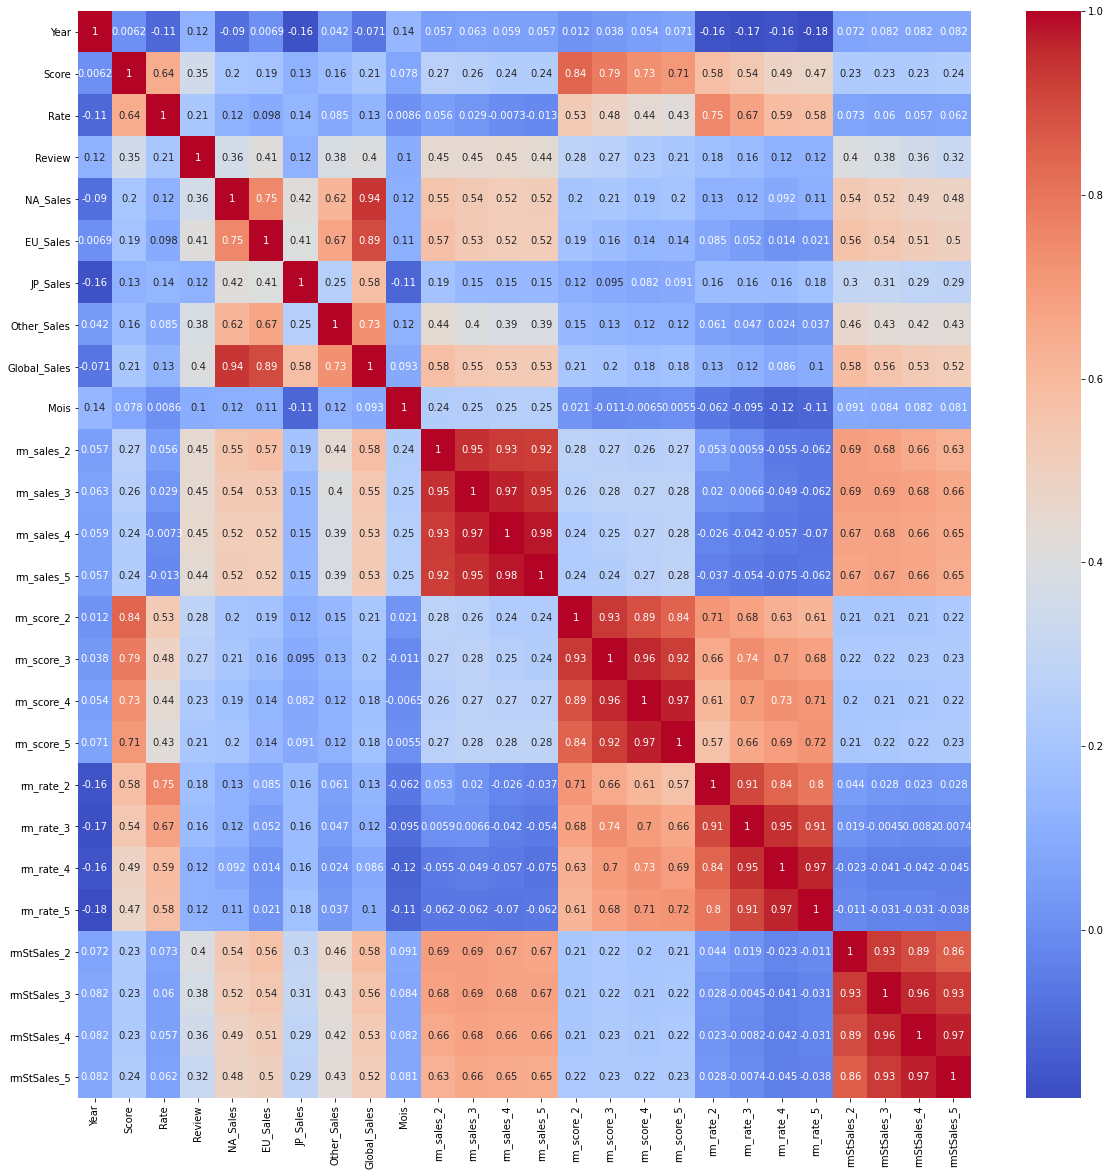

In [36]:
cor = df_final.corr()

fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(
    cor, 
    annot=True,
    ax=ax, 
    cmap='coolwarm'
)

# TEST MACHINE LEARNING REGRESSION

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20121 entries, 10975 to 19860
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             20121 non-null  object 
 1   Platform         20121 non-null  object 
 2   Year             19857 non-null  float64
 3   Genre            20121 non-null  object 
 4   Publisher        20058 non-null  object 
 5   DateSortie       20121 non-null  object 
 6   Studio           17456 non-null  object 
 7   Score            13612 non-null  float64
 8   Rate             14730 non-null  float64
 9   Review           12700 non-null  float64
 10  NA_Sales         20121 non-null  float64
 11  EU_Sales         20121 non-null  float64
 12  JP_Sales         20121 non-null  float64
 13  Other_Sales      20121 non-null  float64
 14  Global_Sales     20121 non-null  float64
 15  GK_licence       13577 non-null  object 
 16  GK_distributeur  3108 non-null   object 
 17  Mois    

In [38]:
df_final['rm_sales_3'] = df_final['rm_sales_3'].fillna(df_final['rm_sales_2'])
df_final['rm_sales_4'] = df_final['rm_sales_4'].fillna(df_final['rm_sales_3'])
df_final['rm_sales_5'] = df_final['rm_sales_5'].fillna(df_final['rm_sales_4'])
df_final['rmStSales_3'] = df_final['rmStSales_3'].fillna(df_final['rmStSales_2'])
df_final['rmStSales_4'] = df_final['rmStSales_4'].fillna(df_final['rmStSales_3'])
df_final['rmStSales_5'] = df_final['rmStSales_5'].fillna(df_final['rmStSales_4'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20121 entries, 10975 to 19860
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             20121 non-null  object 
 1   Platform         20121 non-null  object 
 2   Year             19857 non-null  float64
 3   Genre            20121 non-null  object 
 4   Publisher        20058 non-null  object 
 5   DateSortie       20121 non-null  object 
 6   Studio           17456 non-null  object 
 7   Score            13612 non-null  float64
 8   Rate             14730 non-null  float64
 9   Review           12700 non-null  float64
 10  NA_Sales         20121 non-null  float64
 11  EU_Sales         20121 non-null  float64
 12  JP_Sales         20121 non-null  float64
 13  Other_Sales      20121 non-null  float64
 14  Global_Sales     20121 non-null  float64
 15  GK_licence       13577 non-null  object 
 16  GK_distributeur  3108 non-null   object 
 17  Mois    

In [39]:
df_ml = df_final[df_final['rm_sales_2'].isna() == False]
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10282 entries, 2389 to 19029
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             10282 non-null  object 
 1   Platform         10282 non-null  object 
 2   Year             10171 non-null  float64
 3   Genre            10282 non-null  object 
 4   Publisher        10254 non-null  object 
 5   DateSortie       10282 non-null  object 
 6   Studio           9452 non-null   object 
 7   Score            7660 non-null   float64
 8   Rate             8361 non-null   float64
 9   Review           7470 non-null   float64
 10  NA_Sales         10282 non-null  float64
 11  EU_Sales         10282 non-null  float64
 12  JP_Sales         10282 non-null  float64
 13  Other_Sales      10282 non-null  float64
 14  Global_Sales     10282 non-null  float64
 15  GK_licence       10214 non-null  object 
 16  GK_distributeur  1603 non-null   object 
 17  Mois     

In [40]:
df_ml = df_ml.drop(['GK_distributeur', 'rm_score_2', 'rm_score_3', 'rm_score_4', 'rm_score_5', 'rm_rate_2', 'rm_rate_3', 'rm_rate_4', 'rm_rate_5', 'Publisher', 'DateSortie', 'Studio', 'GK_licence', 'Platform'], axis=1)

In [41]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10282 entries, 2389 to 19029
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          10282 non-null  object 
 1   Year          10171 non-null  float64
 2   Genre         10282 non-null  object 
 3   Score         7660 non-null   float64
 4   Rate          8361 non-null   float64
 5   Review        7470 non-null   float64
 6   NA_Sales      10282 non-null  float64
 7   EU_Sales      10282 non-null  float64
 8   JP_Sales      10282 non-null  float64
 9   Other_Sales   10282 non-null  float64
 10  Global_Sales  10282 non-null  float64
 11  Mois          10282 non-null  float64
 12  rm_sales_2    10282 non-null  float64
 13  rm_sales_3    10282 non-null  float64
 14  rm_sales_4    10282 non-null  float64
 15  rm_sales_5    10282 non-null  float64
 16  rmStSales_2   8553 non-null   float64
 17  rmStSales_3   8553 non-null   float64
 18  rmStSales_4   8553 non-

In [42]:
df_sansNa = df_ml.dropna(axis = 0, how = 'any')
df_sansNa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5812 entries, 2389 to 17235
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          5812 non-null   object 
 1   Year          5812 non-null   float64
 2   Genre         5812 non-null   object 
 3   Score         5812 non-null   float64
 4   Rate          5812 non-null   float64
 5   Review        5812 non-null   float64
 6   NA_Sales      5812 non-null   float64
 7   EU_Sales      5812 non-null   float64
 8   JP_Sales      5812 non-null   float64
 9   Other_Sales   5812 non-null   float64
 10  Global_Sales  5812 non-null   float64
 11  Mois          5812 non-null   float64
 12  rm_sales_2    5812 non-null   float64
 13  rm_sales_3    5812 non-null   float64
 14  rm_sales_4    5812 non-null   float64
 15  rm_sales_5    5812 non-null   float64
 16  rmStSales_2   5812 non-null   float64
 17  rmStSales_3   5812 non-null   float64
 18  rmStSales_4   5812 non-n

In [43]:
#col à discrétiser = Platform, Genre, Publisher, Studio, GK_licence, GK_distributeur, Année, Mois
cat_cols = ['Genre', 'Mois']
df_final = pd.get_dummies(df_sansNa, columns=cat_cols)
df_final.head()

,Name,Year,Score,Rate,Review,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Mois_3.0,Mois_4.0,Mois_5.0,Mois_6.0,Mois_7.0,Mois_8.0,Mois_9.0,Mois_10.0,Mois_11.0,Mois_12.0
2389,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",2007.0,3.0,5.3,4.0,0.63,0.37,0.00,0.11,1.11,...,0,0,0,0,0,0,0,0,0,0
4067,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",2007.0,3.0,5.3,4.0,0.23,0.27,0.00,0.16,0.66,...,0,0,0,0,0,0,0,0,0,0
4373,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",2007.0,3.0,5.3,4.0,0.51,0.05,0.00,0.05,0.61,...,0,0,0,0,0,0,0,0,0,0
4479,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",2007.0,3.0,5.3,4.0,0.52,0.03,0.00,0.04,0.59,...,0,0,0,0,0,0,0,0,0,0
6271,"Transformers: The Game (XBox 360, PS2, PS3, Wi...",2007.0,3.0,5.3,4.0,0.32,0.04,0.01,0.04,0.40,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

In [45]:
data = df_final.drop(['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year'], axis=1)
target = df_final['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=66)

In [46]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
lr.score(X_train, y_train)

0.453631589045707

In [48]:
def rmse_cv(model):
    m = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return m

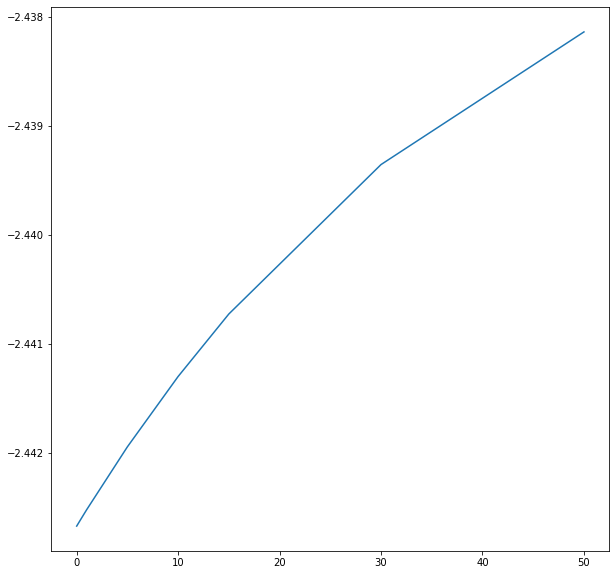

In [49]:
alphas = (0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 30, 50)
rmse_vecteur = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    rmse = rmse_cv(ridge)
    rmse_vecteur.append(rmse)
    
plt.figure(figsize=(10,10))

plt.plot(alphas, rmse_vecteur)

In [50]:
best_ridge = Ridge(alpha=50)
best_ridge.fit(X_train, y_train)
pred_train = best_ridge.predict(X_train)
pred_test = best_ridge.predict(X_test)

#RMSE
print('rmse train :', np.sqrt(mean_squared_error(y_train, pred_train)))
print('rmse test :', np.sqrt(mean_squared_error(y_test, pred_test)))

#Score R2 
print('score train :', best_ridge.score(X_train, y_train))
print('score test :', best_ridge.score(X_test, y_test))

pd.DataFrame({'points_observés': y_test, 'points_predits' : pred_test}, 
             index=X_test.index).head(10)

rmse train : 1.5195265819465633
rmse test : 1.0887770701524764
score train : 0.45339322848219743
score test : 0.42058535420319576


,points_observés,points_predits
17247,0.04,0.189685
19199,0.02,0.715408
3476,0.78,0.484719
2672,1.02,1.459372
1084,2.04,0.500540
3942,0.68,0.530276
2692,1.01,1.857506
3574,0.76,3.343712
9369,0.22,0.207218
5944,0.43,0.623631


In [51]:
alphas = (10, 1, 0.1, 0.001, 0.0005)
lasso = LassoCV(cv=10, alphas=alphas)
lasso.fit(X_train, y_train)
pred_test = lasso.predict(X_test)
print('rmse test :', np.sqrt(mean_squared_error(y_test, pred_test)))
print('score test :', lasso.score(X_test, y_test))

rmse test : 1.0909899692201486
score test : 0.4182276830828662


In [52]:
coef = pd.Series(lasso.coef_)
print('Nb de variables éliminées : ', coef[coef==0].shape[0])
print('Nb de variables retenues : ', coef[coef!=0].shape[0])

Nb de variables éliminées :  4
Nb de variables retenues :  31


In [53]:
coef_df = pd.DataFrame.from_dict({'Variable':X_train.columns, 'Coeff':coef})
coef_df['Coeff'] = coef_df['Coeff'].apply(lambda x: np.abs(x))
coef_df = coef_df.sort_values(by='Coeff', ascending=False)
coef_df.head(10)

,Variable,Coeff
15,Genre_Platform,0.494646
6,rm_sales_5,0.311931
5,rm_sales_4,0.308447
20,Genre_Simulation,0.267759
19,Genre_Shooter,0.260714
1,Rate,0.248083
11,Genre_Action,0.224358
8,rmStSales_3,0.190412
18,Genre_Role-Playing,0.183211
23,Mois_1.0,0.173328
